# Sliding Window

- Lets say we are having size n of array elements
- if we take k size of elements in that array, where k <= n. which helps in making calculations over that window frame and slides it based on requirement which is know an Sliding Window

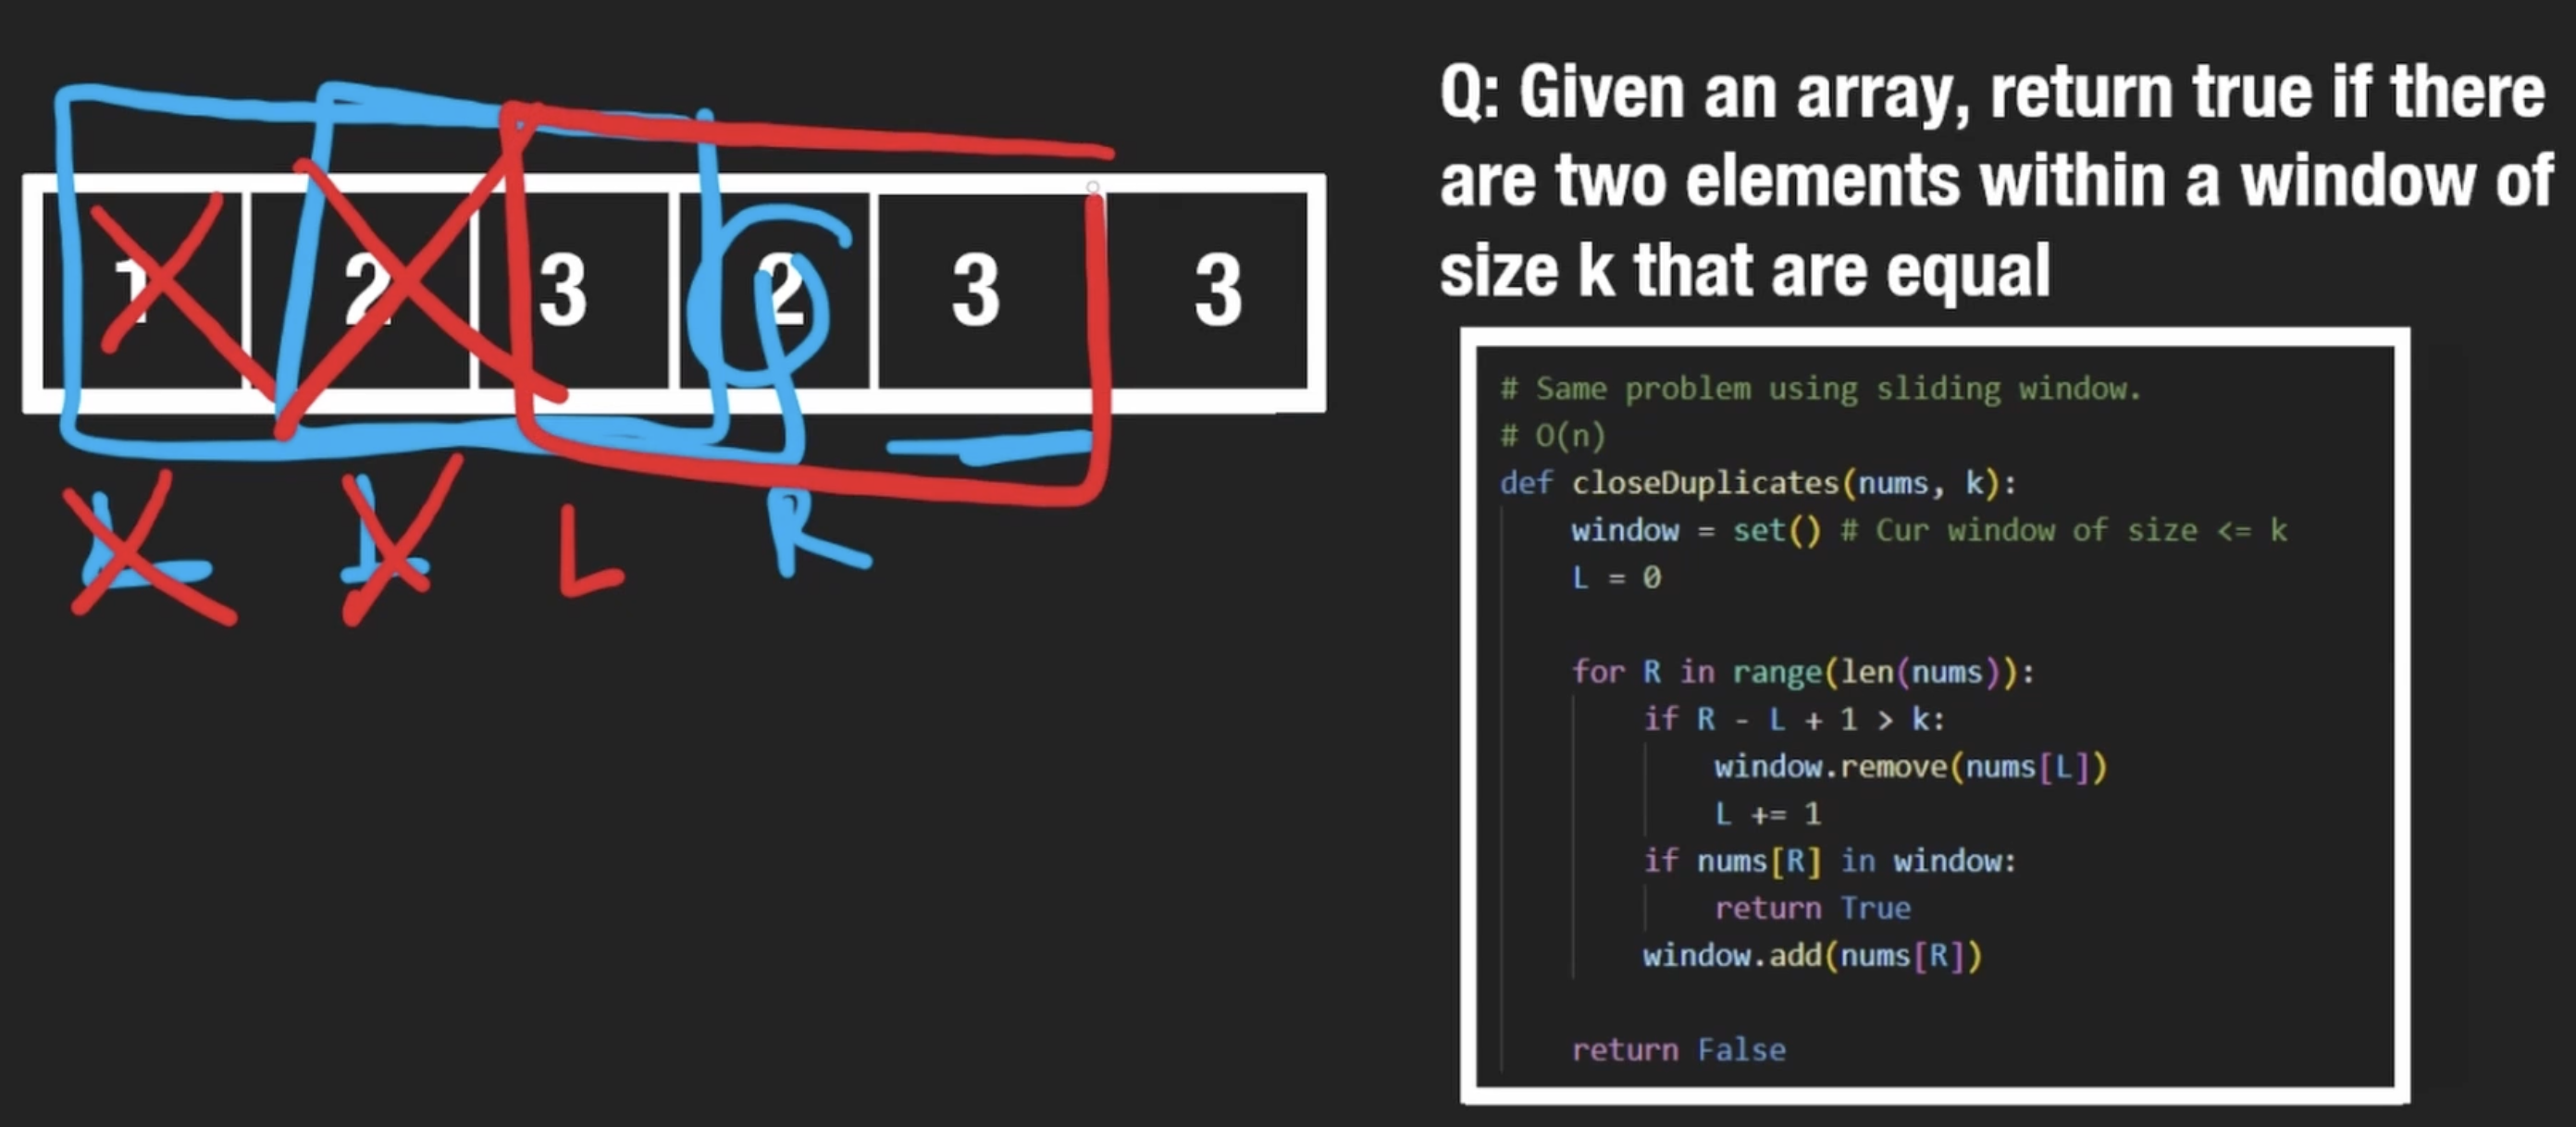

- we are taking a hashset for window size elements and __L__ pointer initially at 0
- we take __R__ pointer range as length of nums, where it is starting from 0
- For 1st if conditions we remove the __Lth__ pointer element if window size > k size inorder to maintain k size & we increment L which slides the window size to next element i.e., incremental window size
- in the 2nd if condition if element is present in set for that window we return true or we add to that set
- at the end we return false if there are no duplicate elements in that window size

In [ ]:
'''
https://www.youtube.com/watch?v=ypn0aZ0nrL4
https://leetcode.com/problems/contains-duplicate-ii/
'''
# T - O(n∗min(n,k)) , S - O(1)
# Brute Force
class Solution:
    def containsNearbyDuplicate(self, nums: List[int], k: int) -> bool:
        for L in range(len(nums)):              # we init. L pointer at starting 0 and increments
            for R in range(L + 1, min(len(nums), L + k + 1)):   # right pt range is from L+1 element to min(len(nums), L+K+1) takes min of both by verifying L+K+1 is not out of bounds
                if nums[L] == nums[R]:  
                    return True         # if already exists True else False
        return False



# Sliding window using hashset optimal solution
# T - O(N), S - O(k)
class Solution:
    def containsNearbyDuplicate(self, nums: List[int], k: int) -> bool:
        window = set()              # initializing set for sliding window
        L = 0                       # left pointer init. @ 0

        for R in range(len(nums)):      # right pointer for range of nums length
            if R - L > k:                   # if out of bounds for k window size
                window.remove(nums[L])      # remove the first element
                L += 1                      # and increment to next L so it slides to next window
            if nums[R] in window:       # if element already present in window set return true
                return True
            window.add(nums[R])         # else add that element to window set
        
        return False                    # if haven't found duplicate in window return false


# Sliding window using hashmap T & S = O(n)
class Solution:
    def containsNearbyDuplicate(self, nums: List[int], k: int) -> bool:
        mp = {}

        for i in range(len(nums)):
            if nums[i] in mp and i - mp[nums[i]] <= k:
                return True
            mp[nums[i]] = i
            
        return False




'''
https://www.youtube.com/watch?v=D8B4tKxMTnY
https://leetcode.com/problems/number-of-sub-arrays-of-size-k-and-average-greater-than-or-equal-to-threshold/
T - O(N) as only once we calculate k size array & later we add l pointer element where it will be O(1).If we add n number subarrays for 
k elements then T will be O(N * k),
S - O(1)
'''

class Solution:
    def numOfSubarrays(self, arr: List[int], k: int, threshold: int) -> int:
        res = 0                             # counter for avg >= threshold
        curSum = sum(arr[:k-1])             # initializing sum of 1st k elements

        for L in range(len(arr) - k + 1):    # we take only k window till the last element without out of bounds.So we take 8 - 3 + 1 it goes till 6th element and right doesn't go out of bounds
            curSum += arr[L + k - 1]        # we add next L pointer element to existing curSum
            if (curSum/k) >= threshold :    # if avg >= threshold increment res value
                res += 1
            curSum -= arr[L]    # as we change window from L in range so no need to remove L pointer element explicitly.So we only removing that index element val in curSum 
        return res              # finally returning the res

# Brute Force T - O(N * k), O(1)
class Solution:
    def numOfSubarrays(self, arr: List[int], k: int, threshold: int) -> int:
        res = 0
        l = 0
        
        for r in range(k - 1, len(arr)):
            sum_ = 0
            for i in range(l, r + 1):
                sum_ += arr[i]
            
            if sum_ / k >= threshold:
                res += 1
            l += 1        
        return res
